In [2]:
# Import our necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Loading our training and test data from our downloaded datasets
df_train = pd.read_csv("big_data.csv")
df_test = pd.read_csv("sentiment-topic-test.tsv", sep="\t") # Use \t as seperator to read .tsv-files

# Clean training data by ensuring all reviews are formatted as a string and remove unwanted lines such as whitespace
df_train["review"] = df_train["review"].astype(str).str.strip() # non-strings and strip whitespaces
df_train = df_train[df_train["review"] != ""] # also remove the rows where the review column is empty to ensure non-empty reviews

# Initialize TF-IDF vectorization model and fit data to
vectorizer = TfidfVectorizer() # Initialize flat vector
X_train = vectorizer.fit_transform(df_train["review"]) # Fit data to our model
X_test = vectorizer.transform(df_test["sentence"]) # Fit data to our model

# Train the model
log_reg = LogisticRegression() # Initialize logistic regression to classify vectors into labels
log_reg.fit(X_train, df_train["label"]) # the actual model training 

# Predict the resulting topic on test data
df_test["predicted_topic"] = log_reg.predict(X_test)

# Show some results
print(df_test[["sentence", "topic", "predicted_topic"]].head())

print()
# Evaluate performance
print("Classification Report:")
print(classification_report(df_test["topic"], df_test["predicted_topic"], digits=3))



                                            sentence   topic predicted_topic
0  The stadium was alive with the roar of the cro...  sports          sports
1  That last-minute goal had me jumping out of my...  sports            book
2  I couldn’t put the book down; it swept me into...    book            book
3  The story had its moments, though some parts f...    book            book
4  I enjoyed the way the timelines shifted, even ...    book            book

Classification Report:
              precision    recall  f1-score   support

        book      0.667     1.000     0.800         6
       movie      1.000     0.500     0.667         6
      sports      0.833     0.833     0.833         6

    accuracy                          0.778        18
   macro avg      0.833     0.778     0.767        18
weighted avg      0.833     0.778     0.767        18



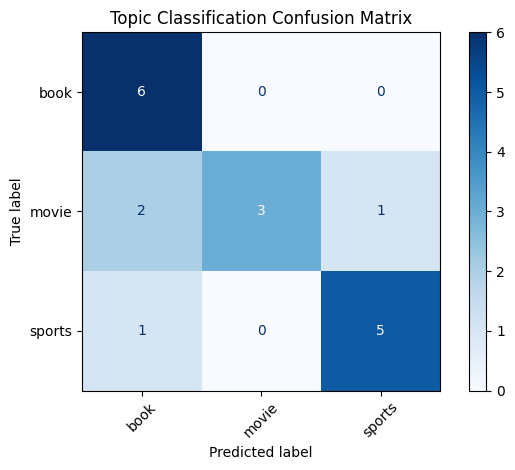

In [3]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(
    df_test["topic"], df_test["predicted_topic"], cmap="Blues"
)
plt.title("Topic Classification Confusion Matrix")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


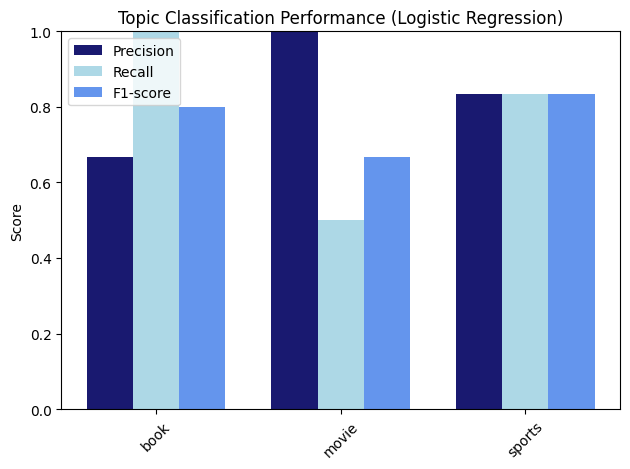

In [27]:
import numpy as np
from sklearn.metrics import classification_report

# Get classification report as dictionary
report = classification_report(df_test["topic"], df_test["predicted_topic"], output_dict=True)

# Filter class labels (remove avg rows)
labels = [label for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']]
precision = [report[label]["precision"] for label in labels]
recall = [report[label]["recall"] for label in labels]
f1 = [report[label]["f1-score"] for label in labels]

# Plot grouped bar chart
x = np.arange(len(labels))
width = 0.25

plt.bar(x - width, precision, width, label='Precision', color='midnightblue')
plt.bar(x, recall, width, label='Recall', color='lightblue')
plt.bar(x + width, f1, width, label='F1-score', color='cornflowerblue')

plt.xticks(x, labels, rotation=45)
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Topic Classification Performance (Logistic Regression)")
plt.legend()
plt.tight_layout()
plt.show()
